In [119]:
import pandas as pd

In [178]:
df = pd.read_csv('bengaluru_house_prices.csv')

In [179]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [180]:
df.shape

(13320, 9)

In [181]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [182]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [183]:
df['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

In [184]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [185]:
df.drop(columns = ['availability','area_type','society','balcony'], inplace = True)

In [186]:
df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [187]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

# Treating missing values

In [188]:
df['location'] = df['location'].fillna('Whitefield')

In [189]:
df['location'] = df['location'].apply(lambda x: x.strip())

In [190]:
df.isna().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

# Cleaning size column

In [191]:
df['size']

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13320, dtype: object

In [192]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [193]:
df['size'] = df['size'].fillna('0 bhk')

In [194]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '0 bhk', '9 Bedroom', '27 BHK', '10 Bedroom',
       '11 Bedroom', '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK',
       '8 BHK', '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [195]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [196]:
df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9,  0, 27, 10, 19, 16, 43, 14,
       12, 13, 18], dtype=int64)

In [197]:
df['bhk'].value_counts()

2     5528
3     4857
4     1417
1      656
5      356
6      221
7      100
8       89
9       54
0       16
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: bhk, dtype: int64

In [198]:
median = df['bhk'].median()
median

3.0

In [199]:
df['bhk'] = df['bhk'].replace(0,median)

In [200]:
df['bhk'].value_counts()

2     5528
3     4873
4     1417
1      656
5      356
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: bhk, dtype: int64

In [201]:
df1 = df.copy()

# Treating missing values in bath column

In [202]:
df1['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [167]:
# df[df['bath'].isna()]

,location,size,total_sqft,bath,price,bhk


In [203]:
df1['bath'] = df1['bath'].fillna(0)

In [204]:
df1['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  0.,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [205]:
df1[df1['bath'] == 0]

,location,size,total_sqft,bath,price,bhk
56,Devanahalli,4 Bedroom,3010 - 3410,0.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,0.0,224.500,4
224,Devanahalli,3 BHK,1520 - 1740,0.0,74.820,3
344,Kanakpura Road,1 BHK,525,0.0,21.530,1
579,Sarjapur Road,0 bhk,1200 - 2400,0.0,34.185,3
...,...,...,...,...,...,...
11496,Kanakpura Road,1 BHK,525,0.0,27.000,1
11569,Hosur Road,0 bhk,1350,0.0,8.440,3
12768,Bettahalsoor,5 Bedroom,3210,0.0,353.000,5
12861,KR Puram,4 BHK,2204 - 2362,0.0,121.000,4


In [207]:
bath_median = df1['bath'].mean()
bath_median

2.677852852852853

In [208]:
df1['bath'] = df1['bath'].replace(0,bath_median)

In [209]:
df1['bath'].unique()

array([ 2.        ,  5.        ,  3.        ,  4.        ,  6.        ,
        1.        ,  9.        ,  2.67785285,  8.        ,  7.        ,
       11.        , 10.        , 14.        , 27.        , 12.        ,
       16.        , 40.        , 15.        , 13.        , 18.        ])

In [210]:
df1.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [211]:
df2 = df1.copy()

# Cleaning sqft column

In [212]:
df2

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [213]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [34]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [214]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.000000,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.677853,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.677853,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.000000,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.000000,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.000000,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.000000,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.677853,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.000000,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.000000,63.770,2


In [36]:
def area(x):
    token = x.split('-')
    if len(token) == 2:
#         a = (token[0] + token[1])/2
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None   

In [37]:
area('200-100')

150.0

In [215]:
df2['total_sqft'] = df2['total_sqft'].apply(area)

In [216]:
df2

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [217]:
df2['total_sqft'].isna().sum()

46

In [218]:
df2.isna().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [219]:
df2.dropna(inplace=True)

In [220]:
df2.drop(columns = ['size'], inplace=True)

In [221]:
df3 = df2.copy()

In [222]:
df3

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5
13316,Richards Town,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,488.00,4


In [223]:
df3.isna().sum()

location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

### Feature Engineering

In [224]:
df3['price_per_sqft'] = df3['price']*100000/df3['total_sqft']

In [225]:
df3

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


# Dimensionality Reduction

In [226]:
df3.location = df3.location.apply(lambda x: x.strip())
location_stats = df3['location'].value_counts(ascending=False)
location_stats

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    271
Thanisandra                       236
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Kannur                              1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1288, dtype: int64

In [227]:
len(location_stats)

1288

In [228]:
loc_less_than_10 =  location_stats[location_stats<=10]

In [229]:
loc_less_than_10

Sadashiva Nagar                   10
BTM 1st Stage                     10
Nagadevanahalli                   10
Sector 1 HSR Layout               10
Basapura                          10
                                  ..
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Kannur                             1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1048, dtype: int64

In [230]:
len(loc_less_than_10)

1048

In [231]:
df3['location'] = df3['location'].apply(lambda x :'other' if x in loc_less_than_10 else x )

In [232]:
df3['location'].value_counts()

other              2876
Whitefield          540
Sarjapur  Road      399
Electronic City     304
Kanakpura Road      271
                   ... 
Doddaballapur        11
Tindlu               11
Marsur               11
HAL 2nd Stage        11
Kodigehalli          11
Name: location, Length: 241, dtype: int64

In [233]:
len(df3['location'].value_counts())

241

In [234]:
df3

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,other,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [235]:
df4 = df3.copy()

# Spotting Outliers

In [236]:
df4[df4.total_sqft/df4.bhk<300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [237]:
df4.shape

(13274, 6)

In [239]:
df4 = df4[~(df4.total_sqft/df4.bhk<300)]
df4.shape

(12530, 6)

In [240]:
df4.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [241]:
import numpy as np
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df5= remove_pps_outliers(df4)
df5.shape

(10302, 6)

In [244]:
from matplotlib import pyplot as plt
import matplotlib

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (10,7)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

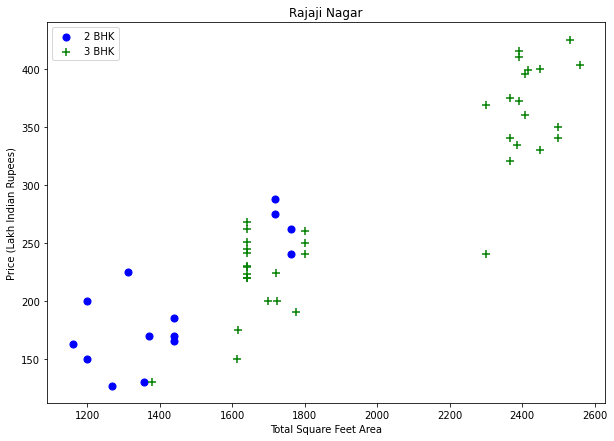

In [245]:
plot_scatter_chart(df5,"Rajaji Nagar")

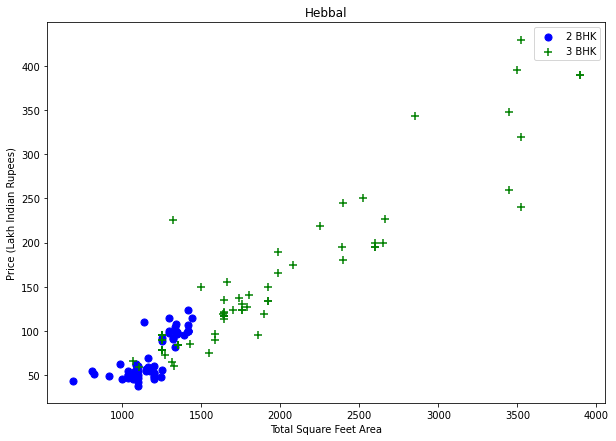

In [246]:
plot_scatter_chart(df2,"Hebbal")

In [247]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_bhk_outliers(df5)
# df8 = df7.copy()
df6.shape

(7349, 6)

In [69]:
# thresh2 = df2['price'].quantile(0.999)

In [70]:
# df2[df2['price']> thresh2]

In [71]:
# df2.price_per_sqft.describe()

In [72]:
# thresh3 = df2['price_per_sqft'].quantile(0.999)

In [73]:
# thresh3

In [74]:
# df2[df2['price_per_sqft'] > thresh3 ]

In [75]:
# thresh4 = df2['price_per_sqft'].quantile(0.01)

In [76]:
# thresh4

In [77]:
# df2[df2['price_per_sqft'] < thresh4 ]

In [248]:
df6.bath.unique()

array([ 4.        ,  3.        ,  2.        ,  5.        ,  8.        ,
        1.        ,  6.        ,  2.67785285,  7.        ,  9.        ,
       12.        , 16.        , 13.        ])

Text(0, 0.5, 'Count')

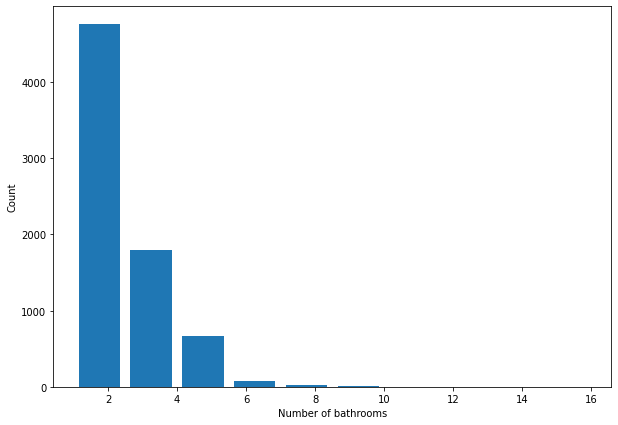

In [249]:
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [250]:
df6[df6.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5313,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8540,other,12000.0,12.0,525.0,10,4375.000000
8629,other,10000.0,16.0,550.0,16,5500.000000
9363,other,6000.0,12.0,150.0,11,2500.000000
9695,other,5425.0,13.0,275.0,13,5069.124424


In [251]:
df6[df6['bath']> df6['bhk']+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5274,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6759,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8465,other,11338.0,9.0,1000.0,6,8819.897689


In [252]:
df6.shape

(7349, 6)

In [253]:
df7 = df6[df6['bath']< df6['bhk']+2]

In [254]:
df7

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...
10293,other,1200.0,2.0,70.0,2,5833.333333
10294,other,1800.0,1.0,200.0,1,11111.111111
10297,other,1353.0,2.0,110.0,2,8130.081301
10298,other,812.0,1.0,26.0,1,3201.970443


In [255]:
df7 = df7.drop(['price_per_sqft'],axis='columns')
df7.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [256]:
loc_df = pd.get_dummies(df7['location'])

In [257]:
loc_df

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [88]:
#3 whietfield

In [258]:
df8 = pd.concat([df7,loc_df.drop(columns = ['other'])], axis=1)

In [259]:
df8

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10293,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10294,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10297,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10298,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [260]:
df8 = df8.drop(['location'],axis='columns')

In [261]:
df8.columns

Index(['total_sqft', 'bath', 'price', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [262]:
df8.shape

(7270, 244)

# Model Building

In [263]:
X = df8.drop(['price'],axis='columns')
X.head(3)


,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [264]:
y  = df8['price']

In [265]:
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10293     70.0
10294    200.0
10297    110.0
10298     26.0
10301    400.0
Name: price, Length: 7270, dtype: float64

In [266]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [267]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()


In [268]:
lr_clf.fit(X_train,y_train)

LinearRegression()

In [269]:
lr_clf.score(X_test,y_test)

0.8316634333169874

In [270]:
y_pred = lr_clf.predict(X_test)

In [271]:
from sklearn.metrics import mean_absolute_error

In [272]:
score = mean_absolute_error(y_test,y_pred)

In [273]:
score

18.38601063447605

In [274]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)

scores = cross_val_score(lr_clf, X, y, cv=cv)

In [275]:
scores

array([0.82030293, 0.84567482, 0.85281359, 0.85392517, 0.81781849])

In [276]:
scores.mean()

0.8381070003315931

In [277]:
import warnings
warnings.filterwarnings('ignore')

In [278]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [110]:
# def get_best_algo(X, y):
    
#     algos = {
#         'linear_reg': {'model' : LinearRegression(),
#                       'params': {'normalize': [True, False]} },
#         'lasso' : {'model' : Lasso(),
#                   'params':{'alpha':[1,2],
#                            'selection' : ['random', 'cyclic']} },
#         'DecisionTree' : {'model': DecisionTreeRegressor(),
#                          'params': {'criterion' : ['mse','friedman_mse'],
#                 'splitter': ['best','random']}}
#     }
#     scores = []
#     cv = ShuffleSplit(n_splits=5, test_size = 0.5, random_state=2)
#     for algo,func in algos.items():
#         grid = GridSearchCV(func['model'], func[ 'params'],cv = cv, return_train_score=False)
#         grid.fit(X,y)
    
#         scores.append({'model': algo,
#             'best_score': grid.best_score_,
#             'best_params': grid.best_params_
#             })
#     return pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [279]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=11)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.845324,{'normalize': True}
1,lasso,0.715252,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.703135,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [280]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [281]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

89.99950503787372

In [282]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

93.34906116146566

In [283]:
predict_price('Indira Nagar',1000, 3, 3)

157.60995818318838

In [284]:
predict_price('Indira Nagar',1000, 2, 2)

154.26040205959646

In [285]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [286]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))